# Titanic Kaggle Competition

<img style="width: 200px;" src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" />

## The Challenge

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!


## The Data

### Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")


In [236]:
train = pd.read_csv("./data/train.csv", index_col="PassengerId")

train.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [237]:
train.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [238]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [239]:
train.dtypes


HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [256]:
train.isna().sum()


HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Starboard         0
Deck              0
dtype: int64

In [241]:
# train.dropna(inplace=True)


In [242]:
def fill_values(data, hasTarget):
    data["VIP"] = data["VIP"].fillna(0).astype(int)
    data["CryoSleep"] = data["CryoSleep"].fillna(0).astype(int)
    data["Starboard"] = data["Cabin"].fillna("").apply(
        lambda x: x.endswith("S")).astype(int)
    data["Deck"] = data["Cabin"].fillna("B").apply(lambda x: x[0])
    if hasTarget:
        data["Transported"] = data["Transported"].fillna(0).astype(int)


fill_values(train, True)
train.dtypes


HomePlanet       object
CryoSleep         int64
Cabin            object
Destination      object
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
Starboard         int64
Deck             object
dtype: object

In [243]:
pd.get_dummies(train[["Destination", "Transported"]]).corrwith(
    train["Transported"]).sort_values()


Destination_TRAPPIST-1e     -0.094700
Destination_PSO J318.5-22    0.000092
Destination_55 Cancri e      0.108722
Transported                  1.000000
dtype: float64

In [244]:
train.corrwith(train["Transported"], numeric_only=True)


CryoSleep       0.460132
Age            -0.075026
VIP            -0.037261
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Starboard       0.101455
dtype: float64

<AxesSubplot: >

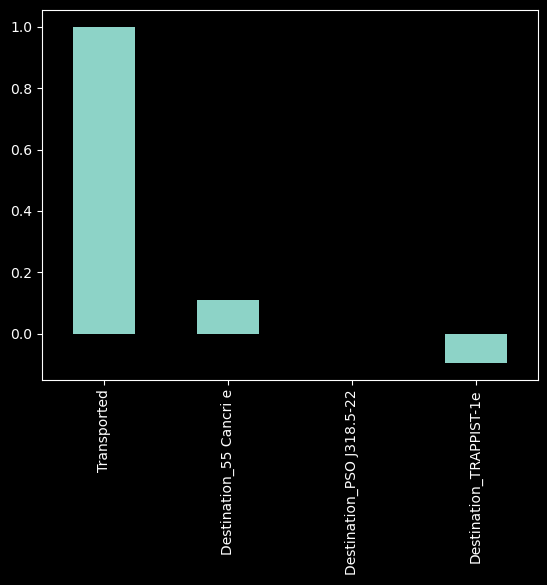

In [245]:
pd.get_dummies(train[["Destination", "Transported"]]).corrwith(
    train["Transported"]).plot(kind="bar")


<AxesSubplot: >

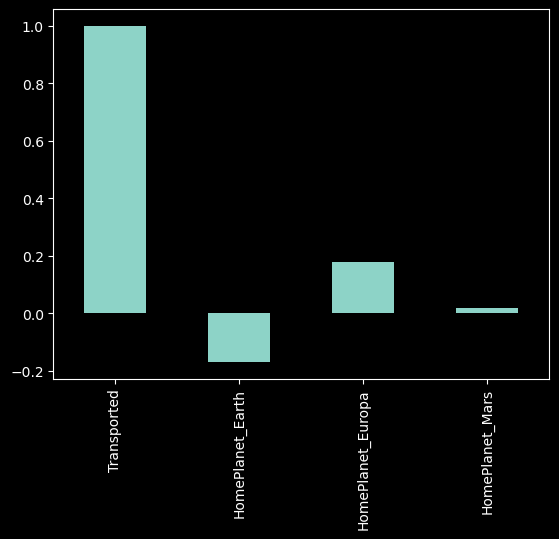

In [246]:
pd.get_dummies(train[["HomePlanet", "Transported"]]).corrwith(
    train["Transported"]).plot(kind="bar")


<AxesSubplot: >

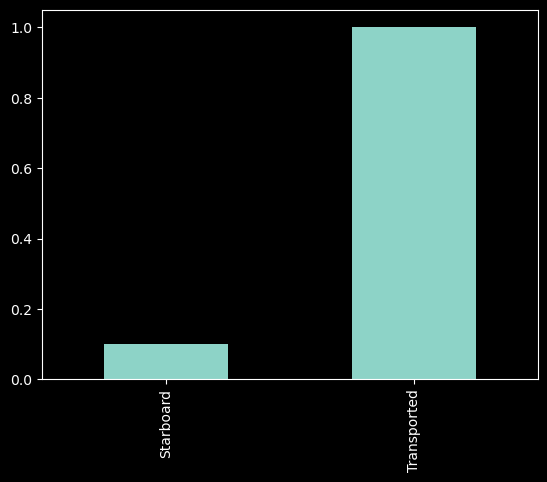

In [247]:
pd.get_dummies(train[["Starboard", "Transported"]]).corrwith(
    train["Transported"]).plot(kind="bar")


In [304]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

categorical_features = ["HomePlanet", "Deck", "Destination",]
numerical_features = [
    "CryoSleep",
    "Age",
    "VIP",
    "RoomService",
    "FoodCourt",
    "ShoppingMall",
    "Spa",
    "VRDeck",
    "Starboard",
]

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)
numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier())]
)

shuffled = train.sample(frac=1)
features = categorical_features + numerical_features
target = "Transported"
X = shuffled[features]
y = shuffled[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CryoSleep', 'Age', 'VIP',
                                                   'RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck', 'Starboard']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'Deck',
                                                   'Destination'])])),
                ('classifier', RandomForestClassifier())])

In [305]:
clf.score(X_test, y_test)


0.7832087406555491

In [307]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(clf, X, y, cv=5))

0.7901769531449034

In [308]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(
    y_test, clf.predict(X_test), output_dict=True))


,0,1,accuracy,macro avg,weighted avg
precision,0.777297,0.789926,0.783209,0.783612,0.783463
recall,0.807865,0.757362,0.783209,0.782613,0.783209
f1-score,0.792287,0.773301,0.783209,0.782794,0.783018
support,890.000000,849.000000,0.783209,1739.000000,1739.000000


In [309]:
for score in ["accuracy", "f1", "recall", "precision", ]:
    print("The " + score + " score is " +
          str(np.mean(cross_val_score(clf, X, y, cv=5, scoring=score))))


The accuracy score is 0.7886815763196048
The f1 score is 0.7845391349032008
The recall score is 0.7617641226353555
The precision score is 0.8110880453122864


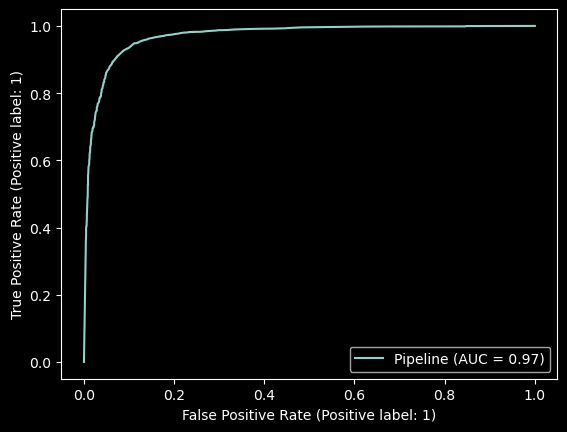

In [310]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X, y);


In [311]:
test = pd.read_csv("./data/test.csv")

fill_values(test, False)


In [312]:
preds = clf.predict(test[features])

In [339]:
submission = pd.DataFrame(
    data={
        "PassengerId": test["PassengerId"],
        "Transported": preds.astype(bool)
    })

In [340]:
submission["Transported"].value_counts()

False    2202
True     2075
Name: Transported, dtype: int64

In [341]:
submission.to_csv("./data/submission.csv", index=False)